#Introduction
Timothy Cantu, NRT191, I used LSTM Model for my method



#IMPORTED LIBRARIES





In [234]:
#Import libraries and connect to google drive
import nltk
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import model specific resources or libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

##Data files used, and how the files are structured

The Dataset used for this Machine Learning Model is a Kaggle Dataset consisting of Fake and Real news articles, formatted in 'csv' files. 

The link to the dataset is: https://www.kaggle.com/c/fake-news/data?select=test.csv

Downloading the dataset will give you two file "train.csv" and "test.csv". For simplicities sake, the contents of both datasets will get combined into one larger data set in which the Model will be trained and tested with.

As shown above, during the making of this Notebook the train and test csv files where loaded into the base path directory that was usued for all class assignment. This was done for consistancy with the class and for simplicity.

In [ ]:
train_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/train.csv")

In [ ]:
train_data.dropna(inplace=True)

### Initializing object and constants
This will set a standard for the .csv files by condensing the data

In [ ]:
ps = PorterStemmer()
sentence_length = 5000
padding_length = 1000
dimension = 100

#Check the final dataset to make sure it is valid for usage

The final dataset that will be used has 2 columns of "text" and "label". There are about 20762 total rows in the dataset, with about a 50:50 percent split between Fake and Real articles in the set. These statistics are shown below. 

0.0    10387
1.0    10374
Name: label, dtype: int64


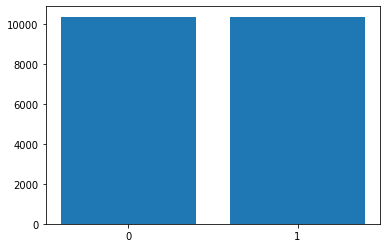

In [ ]:
#graph the total number of fake and real articles in the final dataset
real_or_not = dataset.label.value_counts()
print( real_or_not )

plt.figure()
plt.bar( ['0','1'], real_or_not )
plt.show()

## Cleaning the data
cleaning up the data and getting it ready for the model

In [ ]:
def pre_process_data(data):
    text = data['title']
    sentence_list = list(map(lambda x: "". join(ps.stem(word) for word in re.sub("[^A-Za-z]", " ", x.lower()) if word not in stopwords.words("english")), text.values))
    encoded_sentences = [one_hot(sentence, sentence_length) for sentence in sentence_list]
    padded_sentences = pad_sequences(encoded_sentences, maxlen=padding_length, padding='pre')
    return padded_sentences

In [ ]:
sen_list = pre_process_data(train_data)

# LSTM Model



In [ ]:
model = Sequential()
model.add(Embedding(sentence_length, dimension, input_length=padding_length))
model.add(LSTM(500))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 1000, 100)         500000    
                                                                 
 lstm_4 (LSTM)               (None, 500)               1202000   
                                                                 
 dense_4 (Dense)             (None, 1)                 501       
                                                                 
Total params: 1,702,501
Trainable params: 1,702,501
Non-trainable params: 0
_________________________________________________________________


# Redefine the input

In [ ]:
x_input = np.array(sen_list)
y_input = np.array(train_data['label'].values)

## Train the model
This is taking the train.csv file and using the LSMT model to train the method.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_input, y_input, test_size=0.2,  =1)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=2, batch_size=64)

Epoch 1/2
229/229 [==============================] - 3961s 17s/step - loss: 0.2826 - accuracy: 0.8714 - val_loss: 0.1986 - val_accuracy: 0.9207
Epoch 2/2
229/229 [==============================] - 3889s 17s/step - loss: 0.1649 - accuracy: 0.9345 - val_loss: 0.1931 - val_accuracy: 0.9193


## Test data 
Now that the model has been trained, we are taking the test.csv file and predicting the outcome

In [192]:
test_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/test.csv")
test_data.fillna(inplace=True, method='pad')

In [201]:
test_sentence_list = pre_process_data(test_data)
test_input = np.array(test_sentence_list)
test_output = model.predict(test_input)

In [302]:
classes_x = (test_output > 0.1).astype("int32")

In [303]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, classes_x)

array([[ 907, 1169],
       [ 715,  866]])

In [309]:
#A helpful function pulled from a website (credited at the end of this Notebook) that will print out the results of the Models processing in a concise and understandable manner.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

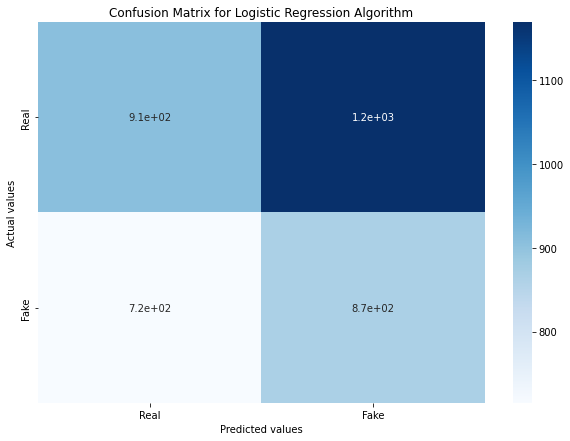

In [310]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, classes_x)
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

Confusion matrix, without normalization


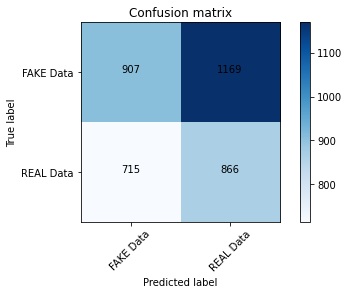

In [311]:
cm = confusion_matrix(y_test, classes_x)
plot_confusion_matrix(cm,classes = ['FAKE Data','REAL Data'])

## Sources and References used:
https://www.kaggle.com/c/fake-news/data?select=test.csv

https://www.researchgate.net/publication/311990858_Attention-based_LSTM_for_Aspect-level_Sentiment_Classification

https://www.kaggle.com/code/sanjayanbu/fake-news-lstm/notebook

https://github.com/Aie959/AI-NLP-Fake-News
